In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("data/StudentsPerformance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#check for missing values:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#check for dublicated:
data.duplicated().sum()
#if duplicated are prasent we can remove using the sytax:
#source_df.drop_duplicates()

0

In [6]:
#checking thenumber of usinque values in each column:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
#check stats of the dataset:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
717,female,group C,associate's degree,standard,completed,96,96,99


In [9]:
print("gender :",data['gender'].unique())
print("race/ethnicity :",data['race/ethnicity'].unique())

print("parental level of education :",data['parental level of education'].unique())
print("lunch :",data['lunch'].unique())
print("test preparation course :",data['test preparation course'].unique())




gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [11]:
numeric_features

['math score', 'reading score', 'writing score']

In [12]:
categorical_features 

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
data['gender'].dtype

dtype('O')

In [15]:
data['math score'].dtype

dtype('int64')

In [16]:
#here we will do adding the given last 3 results in to the average attribute:
data['total score']=data['math score']+data['reading score']+data['writing score']
data['average score']=data['total score']/3
data.sample()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


In [17]:
math_score=data[data['math score']==100]['average score'].count()
print(f'number of students with full marks in writing:{math_score}')

reading_full = data[data['reading score'] == 100]['average score'].count()
print(f'Number of students with full marks in Maths: {reading_full}')

writing_full=data[data['writing score']==100]['average score'].count()
print(f'number of students with full marks in writing:{writing_full}')


number of students with full marks in writing:7
Number of students with full marks in Maths: 17
number of students with full marks in writing:14


In [18]:
reading_less_20 = data[data['reading score'] <= 20]['average score'].count()
writing_less_20 = data[data['writing score'] <= 20]['average score'].count()
math_less_20 = data[data['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


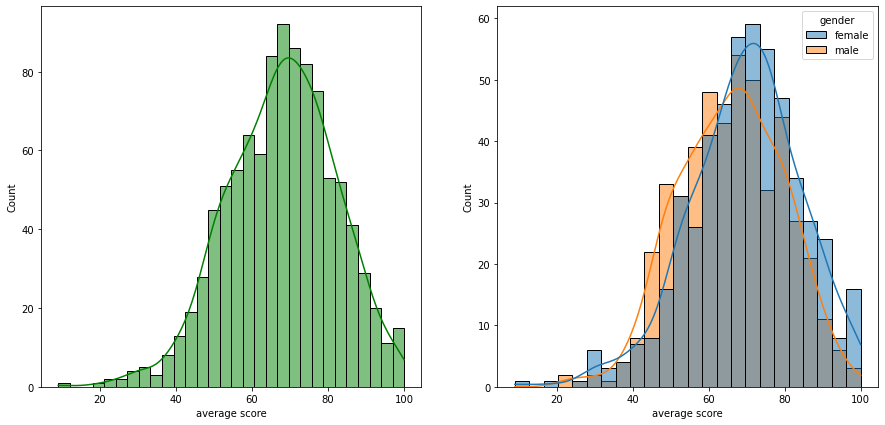

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average score',kde=True,hue='gender')
plt.show()

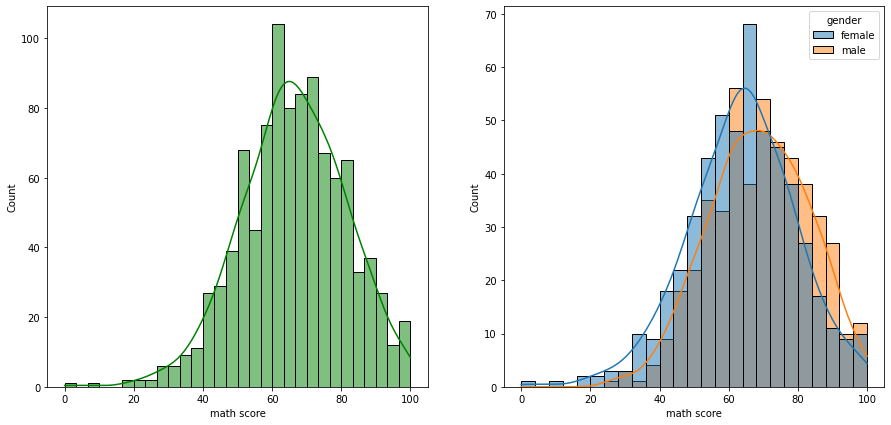

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='math score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='math score',kde=True,hue='gender')
plt.show()

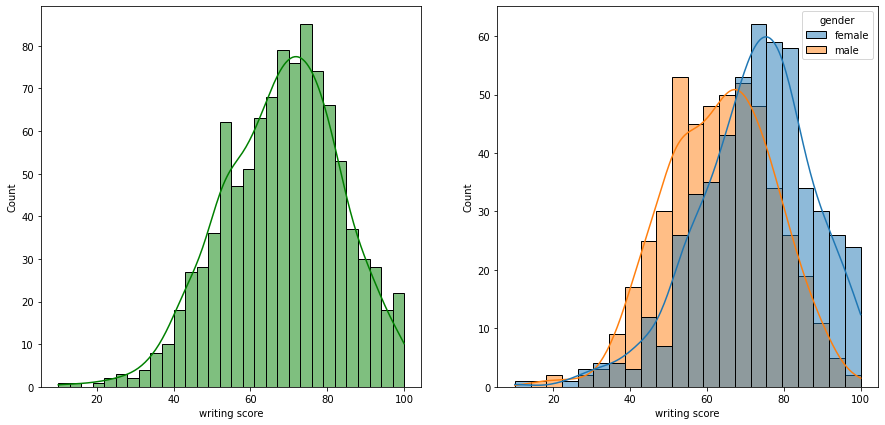

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='writing score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='writing score',kde=True,hue='gender')
plt.show()

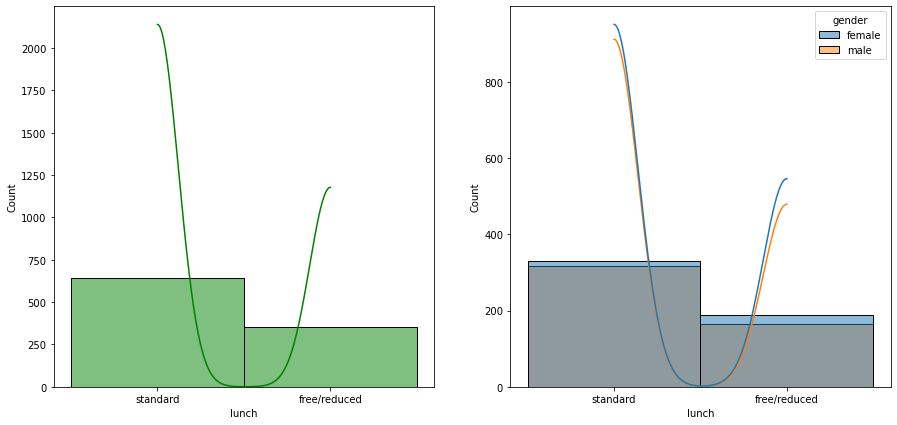

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='lunch',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='lunch',kde=True,hue='gender')
plt.show()

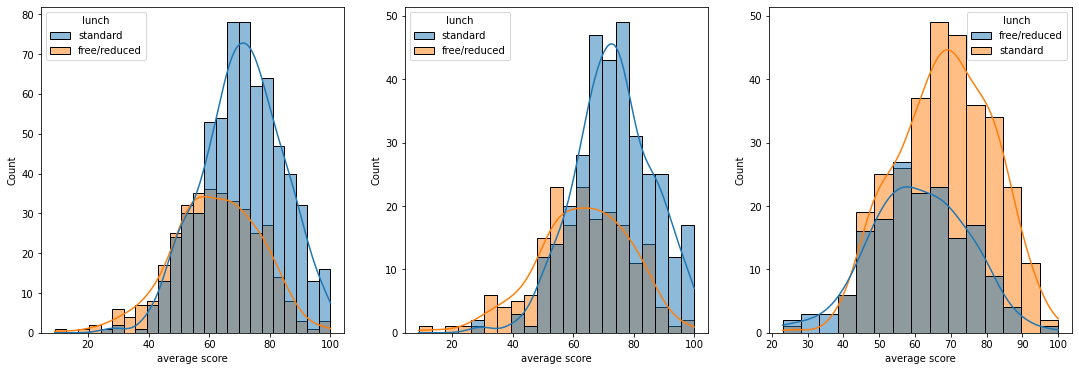

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

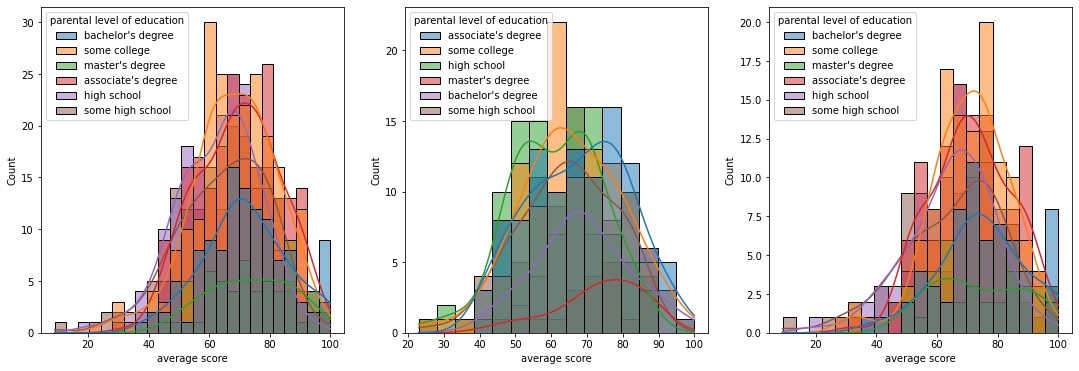

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

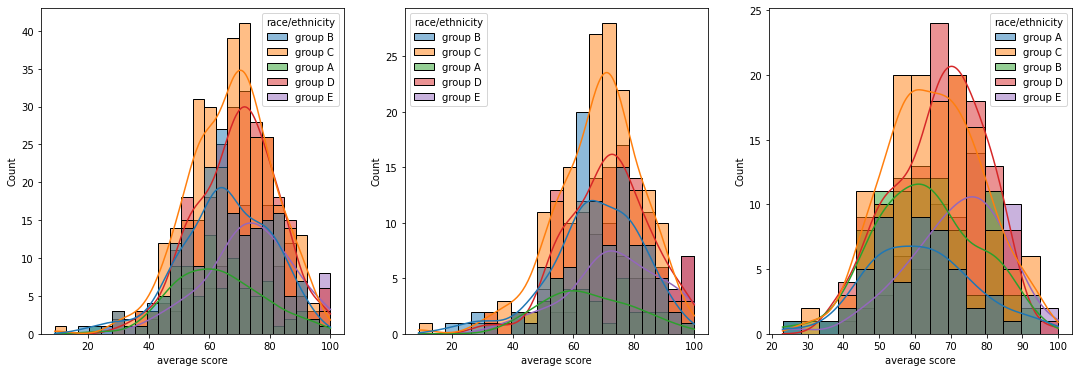

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average score' ,kde=True,hue='race/ethnicity')
plt.show()

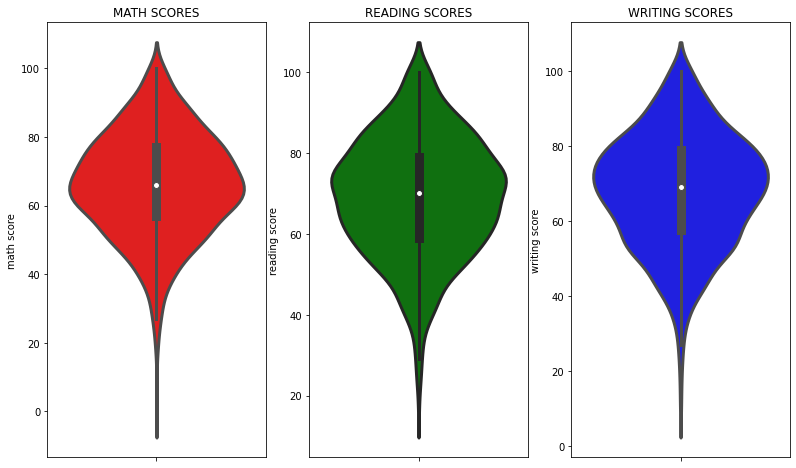

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

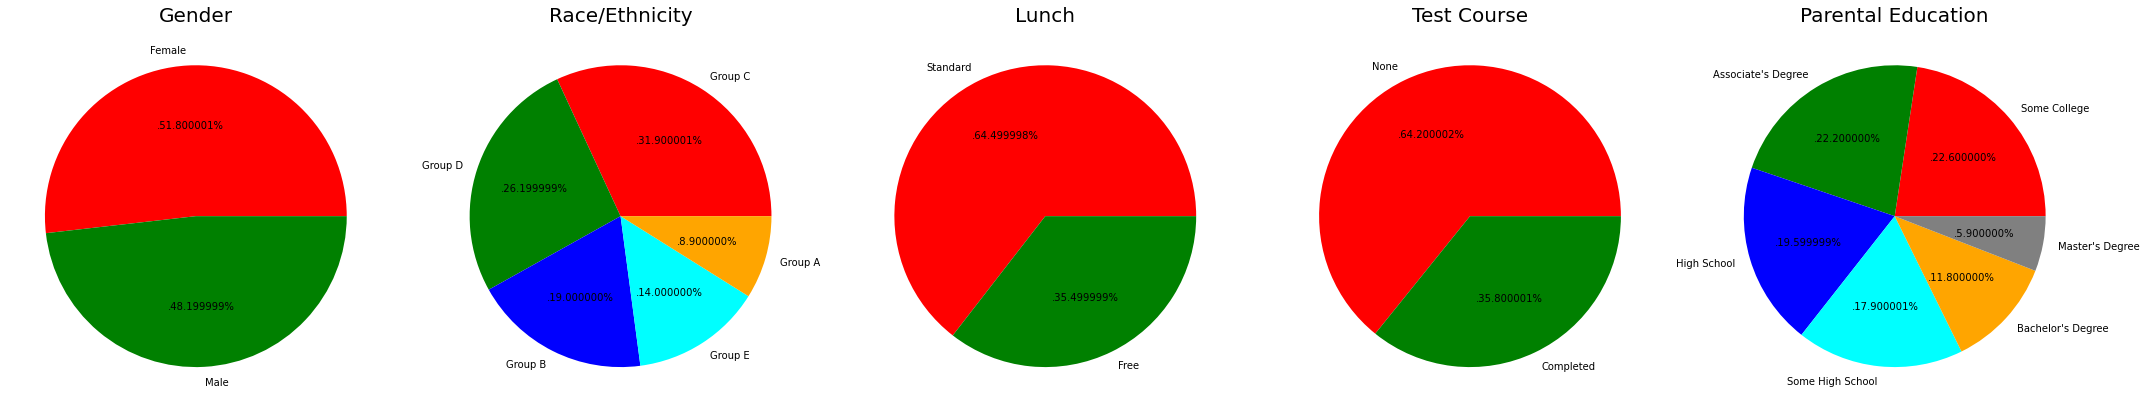

In [27]:
df=data
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

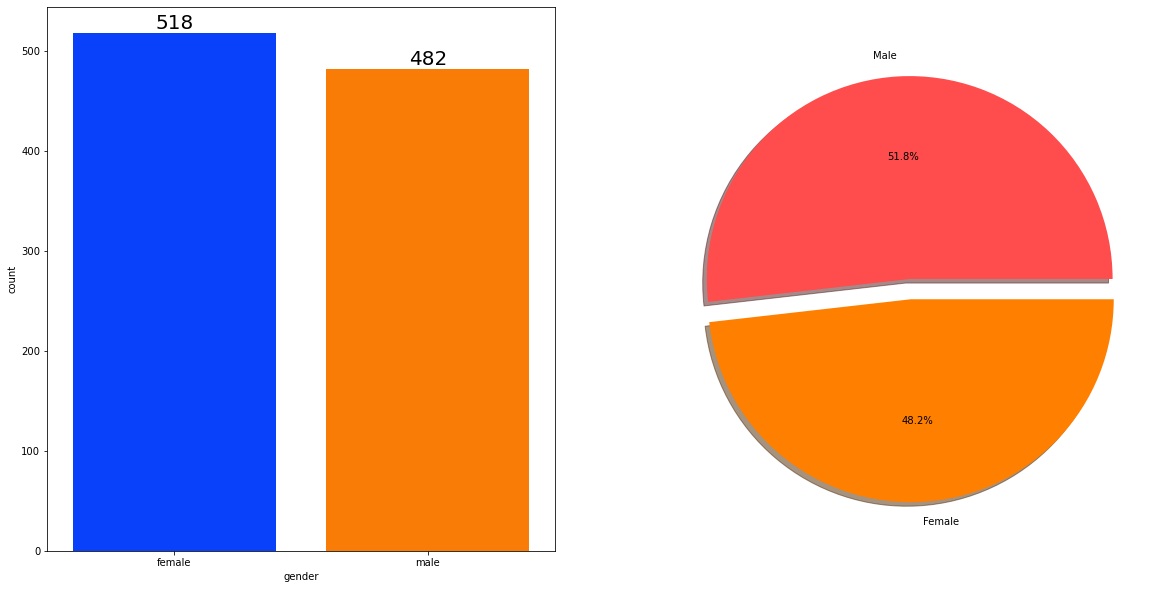

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [29]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


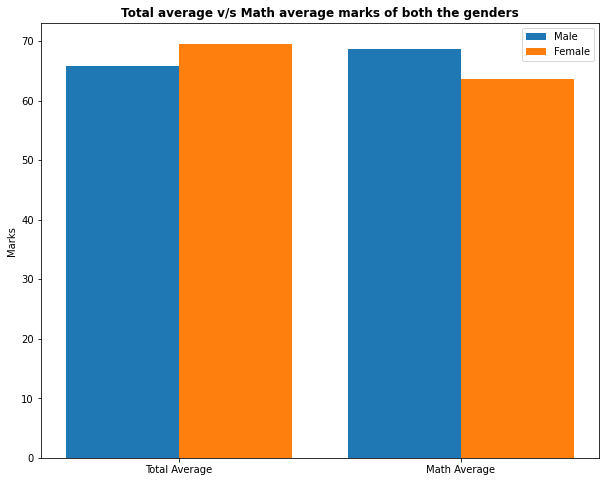

In [30]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

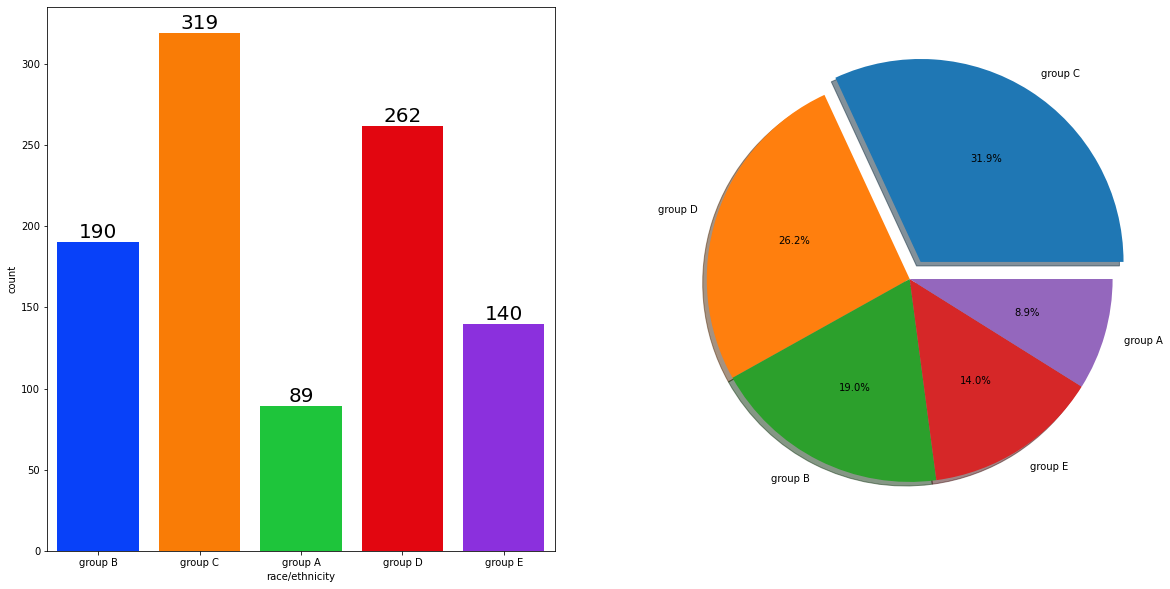

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

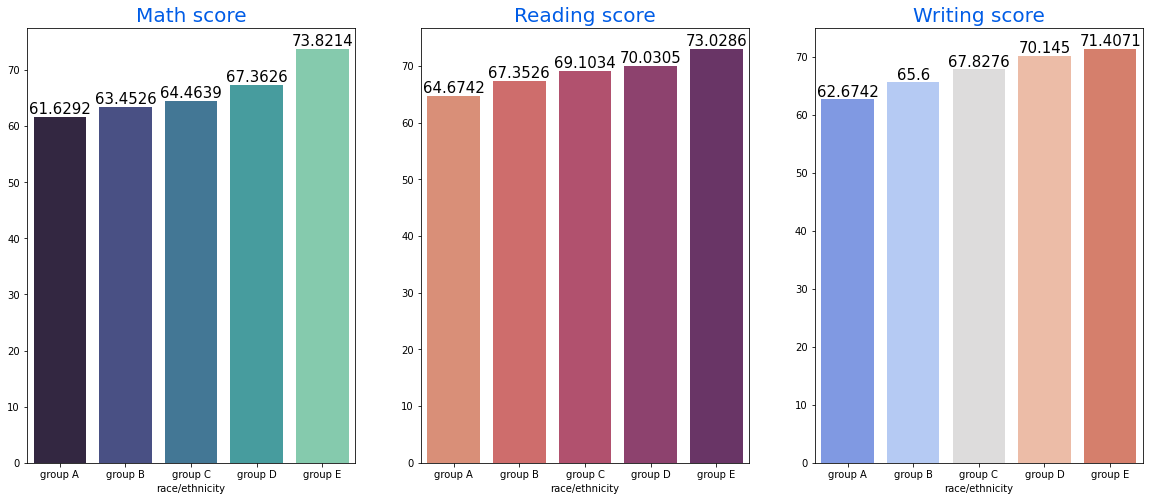

In [32]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

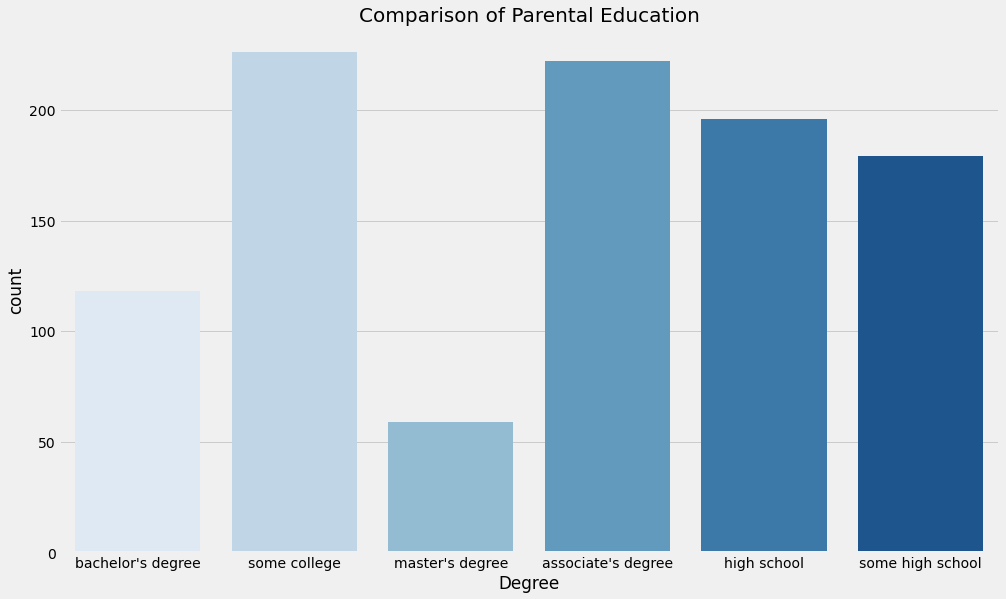

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

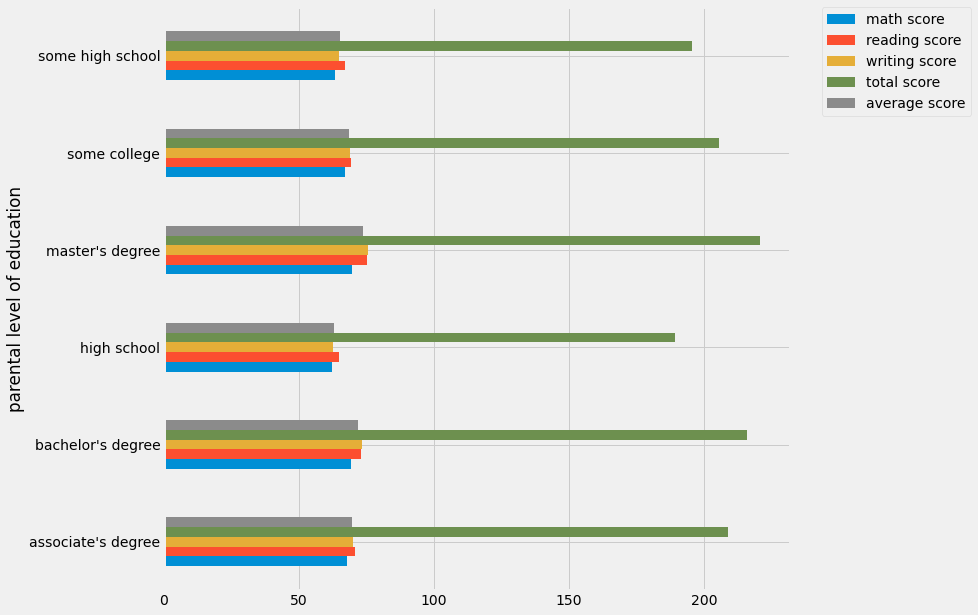

In [34]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

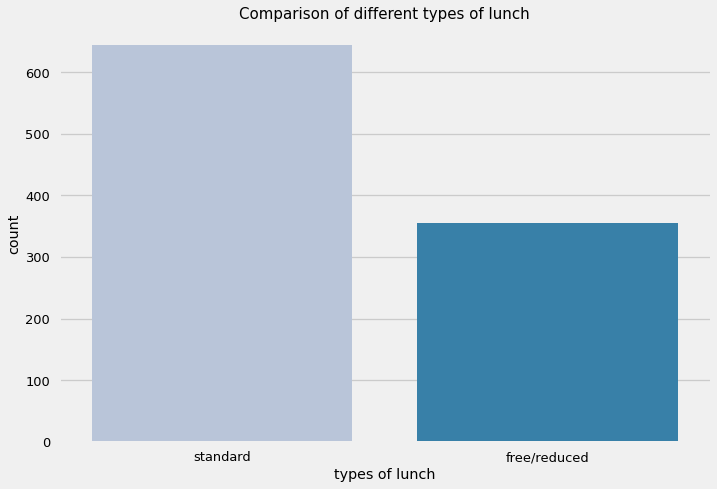

In [35]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 20, fontsize = 15)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

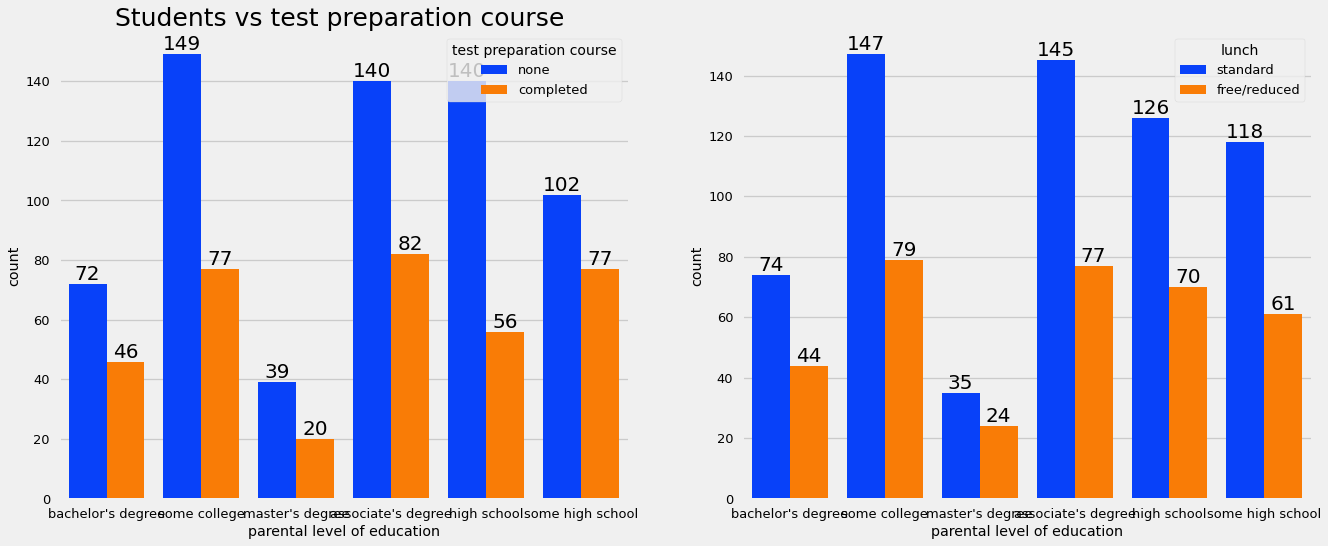

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

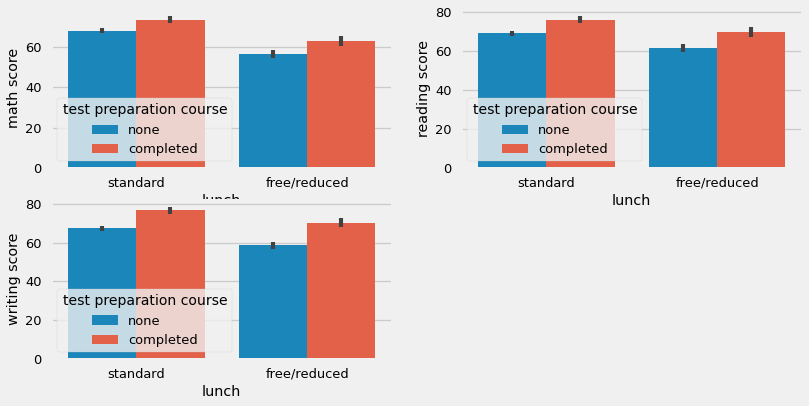

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

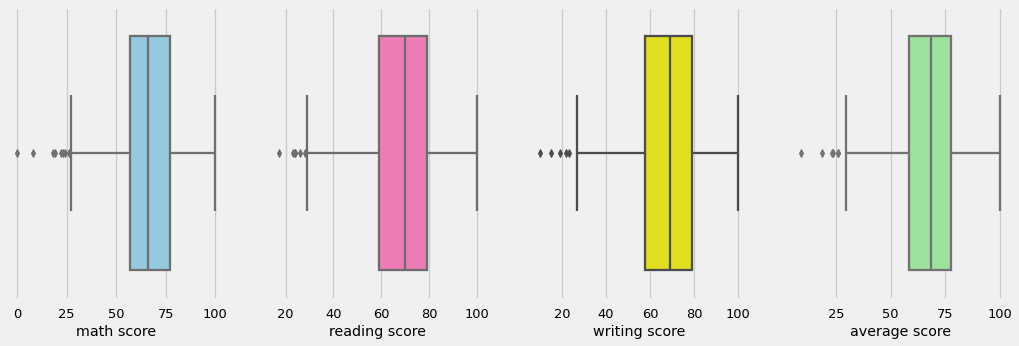

In [38]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

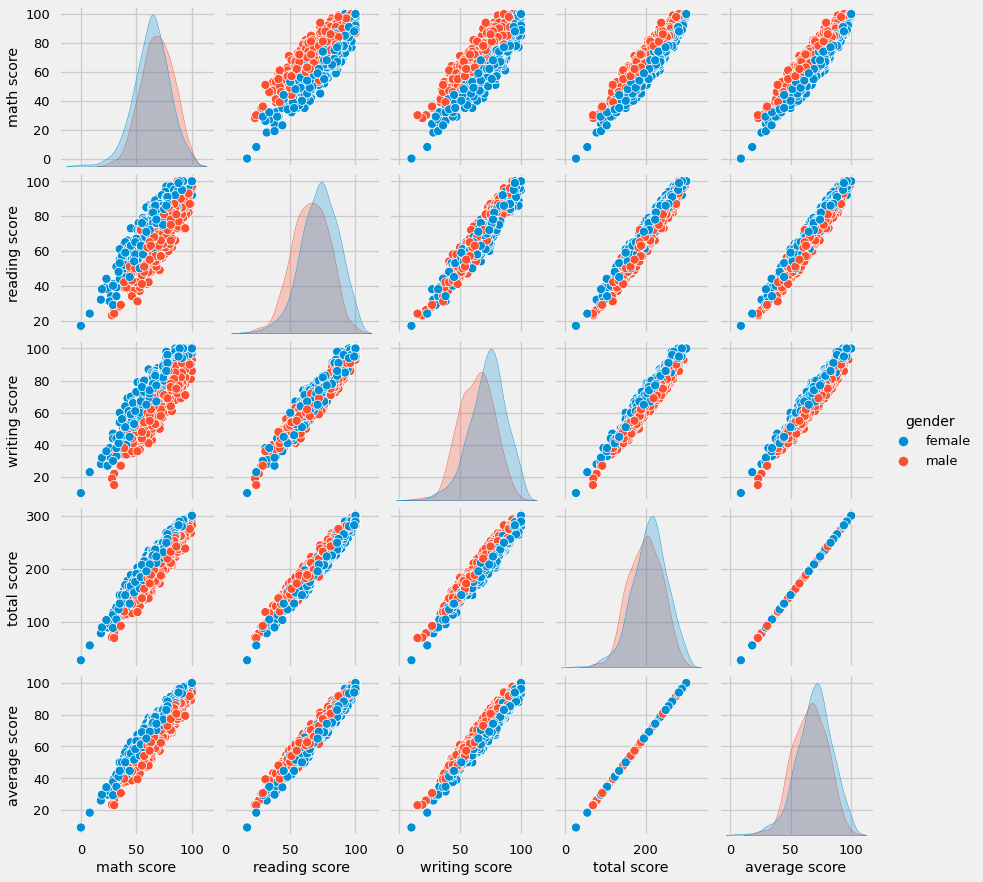

In [39]:
sns.pairplot(df,hue = 'gender')
plt.show()